## Name : Komal
## Track code : DS

# TITANIC SURVIVAL PREDICTION
---

- Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.

- The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

# About the DataSet

### We are using the Titanic Dataset here. It contains both numerical and string values.

# The predefined columns are -

'Passenger ID' - To identify unique passengers
    
'Survived' - If they survived or not

'P Class' - The class passengers travelled in

pclass : A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

'Name' - Passenger Name

'Sex' - Gender of Passenger

'Age' - Age of passenger

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

'SibSp' - Number of siblings or spouse

'Parch' - Parent or child

'Ticket' - Ticket number

'Fare' - Amount paid for the ticket

'Cabin' - Cabin of residence

'Embarked' - Point of embarkmen


### Missingno library offers a very nice way to visualize the distribution of NaN values. 
### Missingno is a Python library and compatible with Pandas.

Install the library –

In [26]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Importing the necessary libraries

In [27]:
import numpy as np                            # for numerical calculations ( arrays,matrices )
import pandas as pd                           # to handle data structures operations
import matplotlib.pyplot as plt               # for graphs & plots
%matplotlib inline
import seaborn as sns                         # for creating heatmap, time series plots, violin plots & so on
import matplotlib.style as style              # for changing of plots
style.use('ggplot')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import missingno as ms                        # for missing values visualization
import warnings
warnings.filterwarnings("ignore")


### Reading the dataset

In [28]:
df = pd.read_csv(r"Titanic-Dataset.csv")

In [29]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Read first 5 rows

In [30]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Read last 5 rows

In [31]:
df.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Shape of the dataframe

In [32]:
df.shape

(891, 12)

### Idea about the number of rows & columns in dataset

In [33]:
print('\033[1m' + 'The number of rows in dataset is' + '\033[0m' , 
      len(df.index),  '.')
print('\033[1m' + 'The number of columns in dataset is' + '\033[0m' , 
      len(df.columns), '.')     


The number of rows in dataset is 891 .
The number of columns in dataset is 12 .


### Information about the dataframe

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Description of dataset in 5 point summary format (min, 25%, 50%, 75%, max)

In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking for null/missing values in the dataset

In [36]:
m_val = df.isnull().sum().sort_values(ascending = False)    # m_val = missing values
m_val


Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

'Observation':

- There is null values in these columns:
   - In Age column, 177 nullvalues
   - In Cabin column, 687 null values
   - In Embarked column, 2 null values

- since the cabin column is not of much use and contains a lot of null values so we will drop it.

### Percentage  of missing values for each features 

In [37]:
mval_per = df.isnull().sum()/df.isnull().count() * 100
df_null = pd.DataFrame({'missing values' : m_val, 'Percentage' : 
                        mval_per.sort_values(ascending = False)})
df_null.head()


,missing values,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000


### Matrix plot to see patterns of missing values

Text(0.5, 1.0, 'Matrix plot to see patterns of missing values')

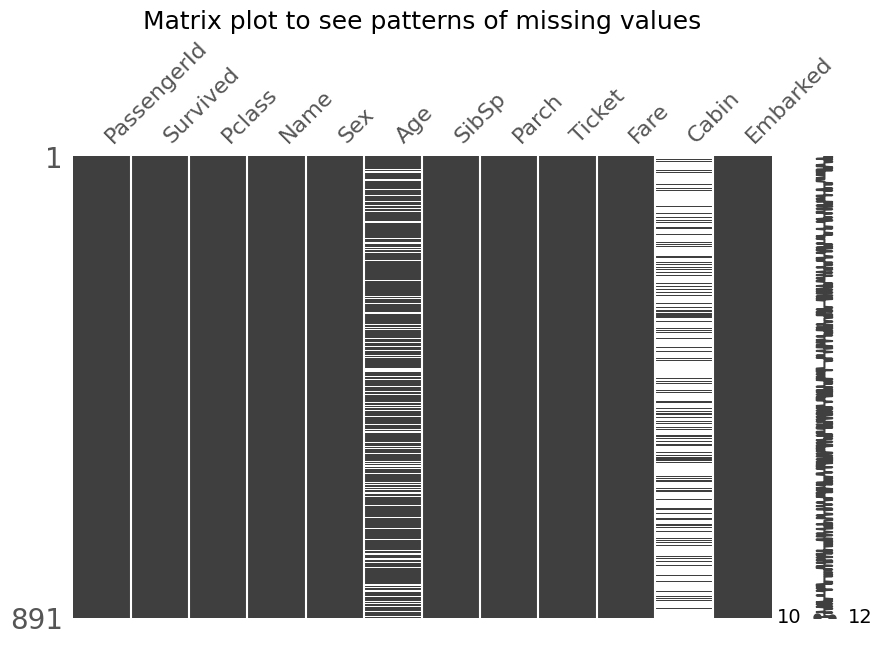

In [38]:
ms.matrix(df, figsize = (10, 6) )
plt.title("Matrix plot to see patterns of missing values", size = 18)


### Barplot to clearly see the lacking of data value

Text(0.5, 1.0, 'Barplot to clearly see the lacking of data value')

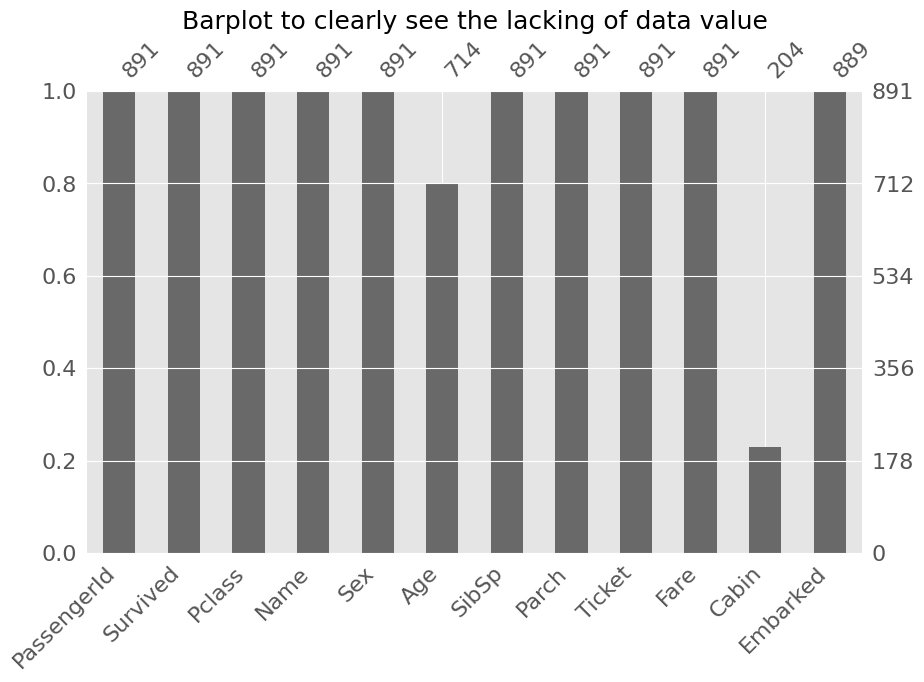

In [39]:
ms.bar(df, figsize= (10,6))
plt.title("Barplot to clearly see the lacking of data value" , size = 18) 


### Dropping unnecessary columns

In [40]:
df.head(5) # Show the data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### drop the 'cabin' column from datasets as it explains the highest percentage of missing values

In [41]:
df.drop(columns = "Cabin", axis = 1, inplace = True)

In [42]:
df.head(5)  # when Cabin column is drop

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### || Replacing missing values with Mean value ||

### Filling the missing values of the age column by Mean value of the column

### A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

Kdeplot of Age mean Vs Density


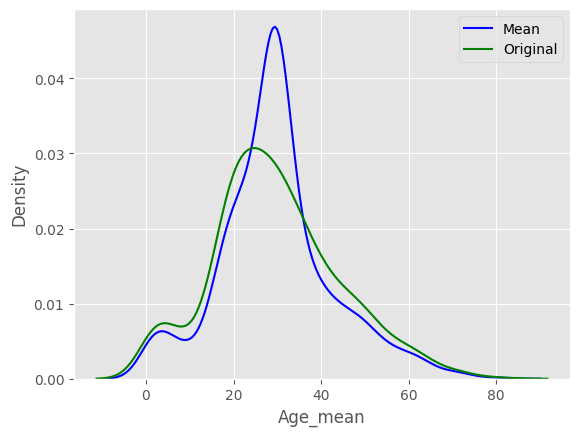

In [43]:
# First we compare between the curves for inital values and replaced-with-mean-values

df['Age_mean'] = df['Age'].fillna(df['Age'].mean())

# Checking difference of curves between replaced and original values

sns.kdeplot(df['Age_mean'] , color = 'blue', label = 'Mean')
sns.kdeplot(df['Age'], color = 'green', label = 'Original')
print("Kdeplot of Age mean Vs Density")
plt.legend()


'observation' :

- Mean is higher as compare to original.

### Filling up the spots of missing values does change the curve

In [44]:
df.head(5) # show the datset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_mean
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.0


In [45]:
df.drop(columns = ['Age_mean'], axis = 1, inplace = True)

# finally we replace them with mean

df['Age'] = df['Age'].fillna(df['Age'].mean())

print("Number of missing values remained in column 'Age' of dataset is" , 
      df['Age'].isnull().sum(), '.')


Number of missing values remained in column 'Age' of dataset is 0 .


In [46]:
df.head(5)  # show the changes in datset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Filling the missing values of the Embarked column by Mode value of the column

In [47]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

In [48]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Again checking for null/missing values in the dataset

In [49]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

'Observation' & 'Interface' :

- Since all the missing values are treated.

### Checking for duplicate values in the dataset

In [50]:
df.duplicated().sum()

0

'Observation' & 'Interface' :

- Since there is no duplicate record.
- Number of duplicated values existed in dataset is 0.

### Checking the survival of people

In [51]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### ||Analysis With Visualization||

### Visualization of survival of people

#### Countplot

In [52]:
# Value counts of survived or not survived passengers
pd.DataFrame({' ' : ['Not Survived' , 'Survived'] ,'Value counts' : df['Survived'].value_counts(),  'Percentage(%)' : [(df['Survived'] == 0).sum() * 100 /len(df) , (df['Survived'] == 1).sum() * 100/len(df)]}).set_index(' ').head()

,Value counts,Percentage(%)
,,
Not Survived,549,61.616162
Survived,342,38.383838


### Counplot of Survived people vs Number of people

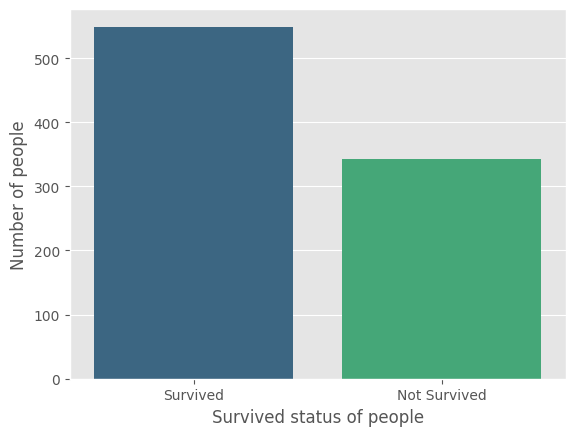

In [53]:
sns.countplot(x = 'Survived', data = df, palette = 'viridis',)
plt.xlabel("Survived status of people")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1] , labels = ['Survived','Not Survived'])
plt.show()


'observation':

- Survived status of people is higher.


### Pie Chart

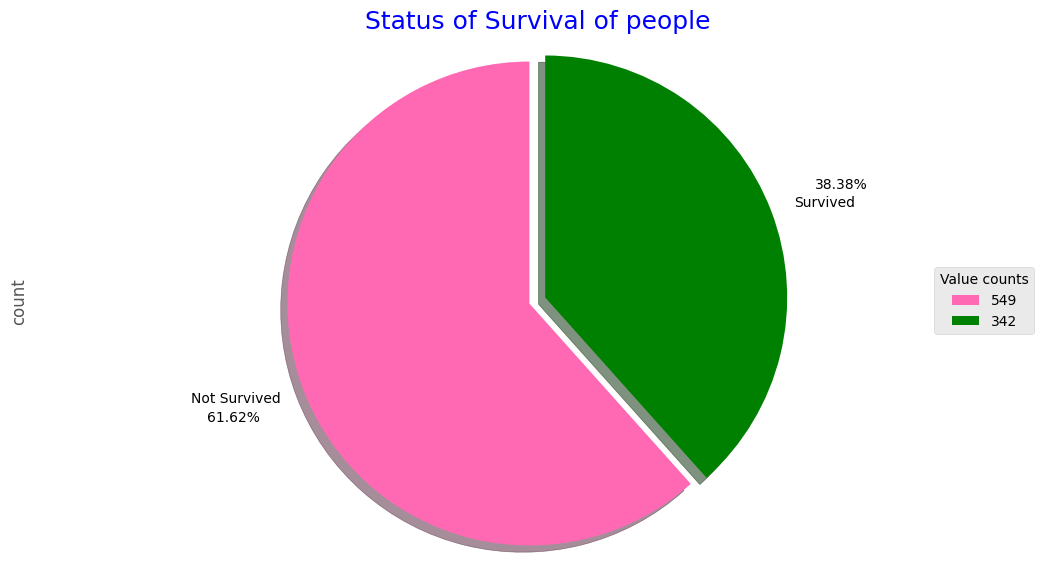

In [54]:

df['Survived'].value_counts().plot(kind = 'pie' ,figsize = (13, 7), shadow = True, startangle = 90 ,pctdistance = 1.31,
        explode = [0, 0.07], autopct = "%1.2f%%", labels = ['Not Survived', 'Survived'], colors = ['hotpink', 'green'])
plt.title('Status of Survival of people' , c = 'b' , size = 18 , y = 0.99)
plt.axis('equal')
plt.legend(title = 'Value counts' , labels = df['Survived'].value_counts(), loc= 'center right')
plt.show()


'observation' :

- Only 38.38% people are Survived.
- 61.62% people are not Survived.


### || Visualization of survived values  with respect to different features ||

### 1. Visualization of people survived from different passenger class

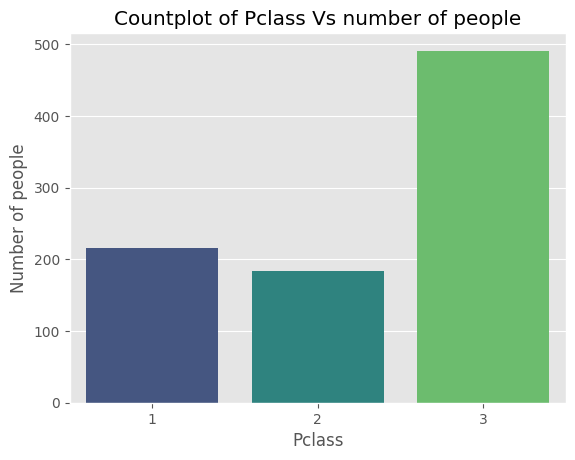

In [55]:
sns.countplot(x = 'Pclass', data = df, palette = 'viridis')
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.title('Countplot of Pclass Vs number of people')
plt.show()


'observation' :

- People from Pclass '3'  is higher 
- Pclass '1' is 2nd highest
- Pclass '2' is least


### 2. Visualization of Status of survived people from different passenger class

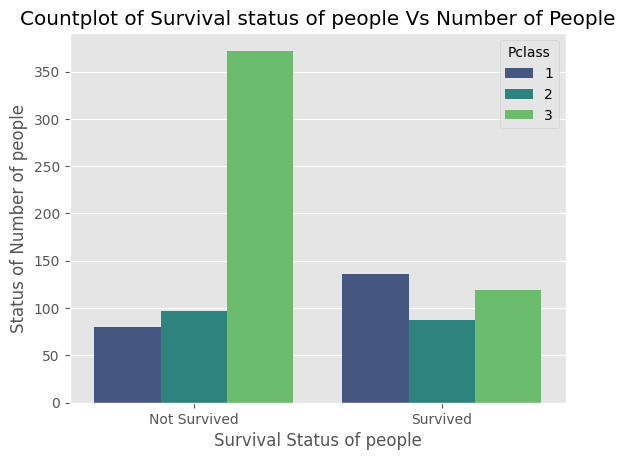

In [57]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette = 'viridis')
plt.xlabel("Survival Status of people")
plt.ylabel("Status of Number of people")
plt.xticks(ticks = [0,1], labels = ['Not Survived' , 'Survived'])
plt.title('Countplot of Survival status of people Vs Number of People')
plt.show()


'observation' :

- Status Of Survived on different Pclass
    - Pclass '1' is highest
    - pclass '2' least
    - Pclass '3' is 2nd highest

- Status of Not survived on different Pclass
    - Pclass '3' is Highest
    - Pclass '2' is 2nd highest
    - Pclass '1' is least


### 3. Visualization of people survived from different passenger class on sex status

Catplot of status of survived people from different pclass on sex status


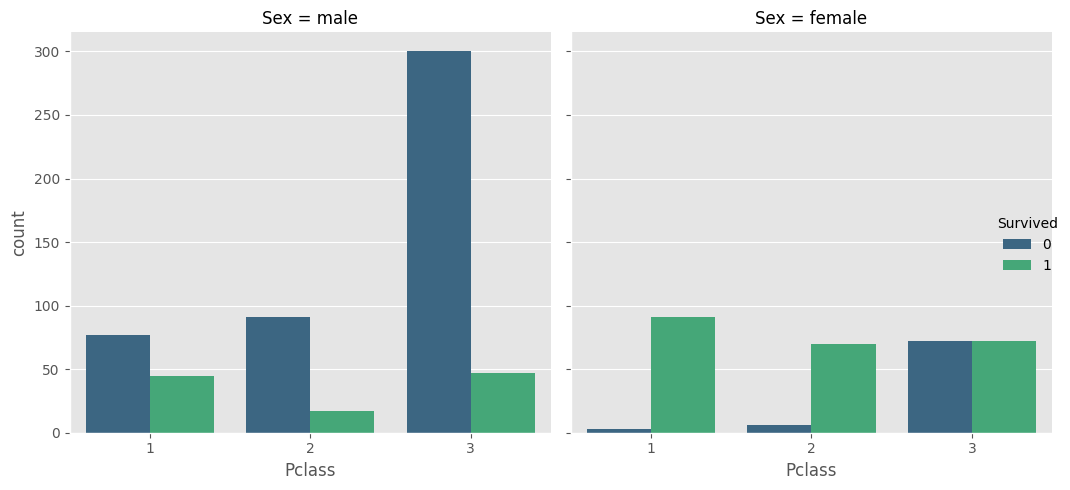

In [60]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = df,palette='viridis' )
plt.tight_layout()
print('Catplot of status of survived people from different pclass on sex status')


'Observation' :

- Most people didn't survive
- Though population of Pclass 3 was the highest, yet they had the least survival rate
- Males from Pclass 3 had the least survival rate


### 4. Visualization of people survived from different gender

In [61]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

### 5. visualizing the population of male and female passenger

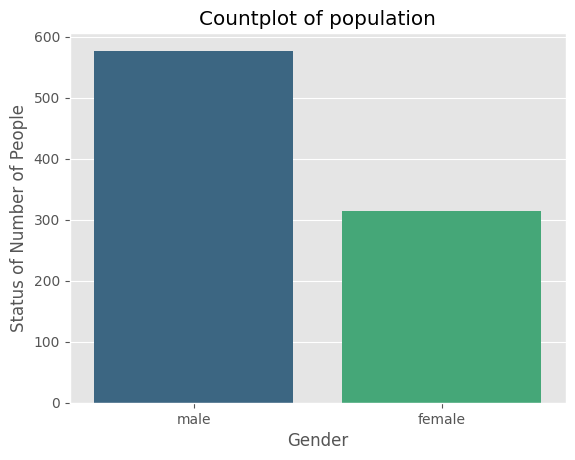

In [63]:
sns.countplot(x = 'Sex', data = df, palette = 'viridis')
plt.xlabel("Gender")
plt.ylabel("Status of Number of People")
plt.title('Countplot of population')
plt.show()


'observation' :

- Male Passenger is higher as compare to Female passenger
  

### 6. visualizing the population of male and female passenger on status of survived or not survived

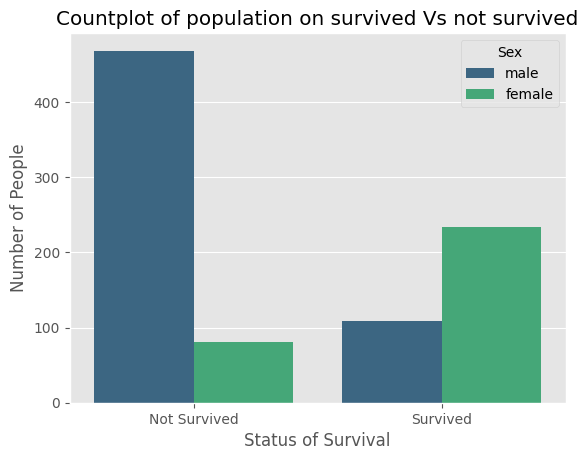

In [64]:
sns.countplot(x = 'Survived', hue = 'Sex', data = df, palette = 'viridis')
plt.xlabel("Status of Survival")
plt.ylabel("Number of People")
plt.xticks(ticks = [0,1], labels = ['Not Survived', 'Survived'])
plt.title('Countplot of population on survived Vs not survived')
plt.show()


'observation' :

- Male passenger are less survived as compare to female passenger on 'survived status'
- Female passenger is less survived as compare to male passenger on 'not survived status'


## Pie Chart

### 1. Pie Chart of Status of male survival rate

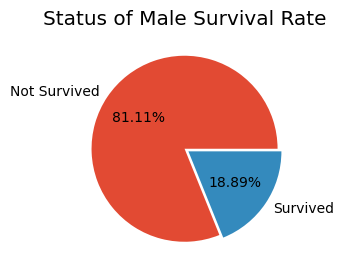

In [65]:
df[df['Sex'] == 'male'].Survived.groupby(df.Survived).count().plot(kind = 'pie', figsize = (3,6) , explode = [0 , 0.05], autopct = '%1.2f%%', labels = ['Not Survived' , 'Survived'])
plt.ylabel("")
plt.title("Status of Male Survival Rate")
plt.show()


'observation' :

- Only 18.89% male are Survived.
- 81.11% people who are male are not survived.
  

### 2. Pie Chart of Female Survival rate 

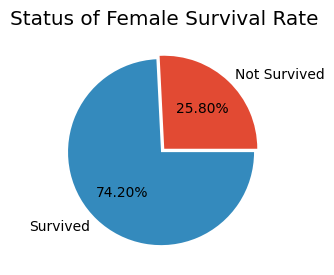

In [67]:
df[df['Sex'] == 'female'].Survived.groupby(df.Survived).count().plot(kind = 'pie', figsize = (3,6) , explode = [0 , 0.05], autopct = '%1.2f%%', labels = ['Not Survived' , 'Survived'])
plt.ylabel("")
plt.title("Status of Female Survival Rate")
plt.show()


'Observation' :

- Only 74.20% female are survived.
- 25.80% female are not survived
- Here, Status of Survival rate was higher in female comparison to male

## || visualizing of different features ||

### 1. Visualization of people survived from different passenger class

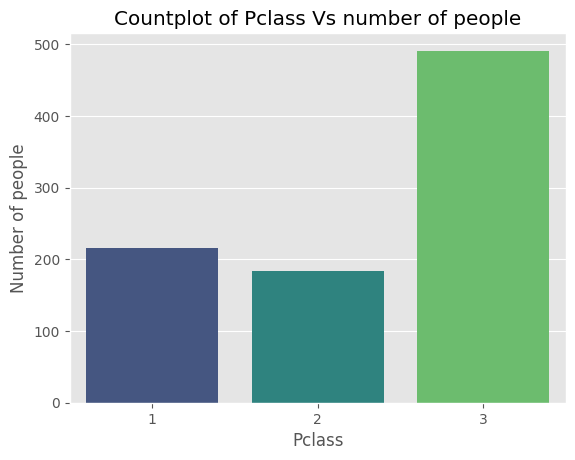

In [68]:
sns.countplot(x = 'Pclass', data = df, palette = 'viridis')
plt.xlabel("Pclass")
plt.ylabel("Number of people")
plt.title('Countplot of Pclass Vs number of people')
plt.show()


'observation' :

- People from Pclass '3'  is highest
- Pclass '1' is 2nd highest
- Pclass '2' is least


### Visualization of people survived from different passenger class

### 2. Visualization of Status of survived people from different passenger class

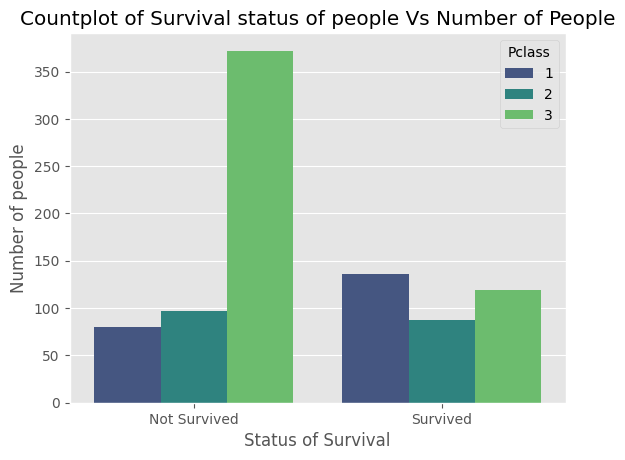

In [66]:
sns.countplot(x = 'Survived', hue = 'Pclass', data = df, palette = 'viridis')
plt.xlabel("Status of Survival")
plt.ylabel("Number of people")
plt.xticks(ticks = [0, 1], labels = ['Not Survived' , 'Survived'])
plt.title('Countplot of Survival status of people Vs Number of People')
plt.show()


'observation' :

- Status Of Survived on different Pclass
    - Pclass '1' is highest
    - pclass '2' least
    - Pclass '3' is 2nd highest

- Status of Not survived on different Pclass
    - Pclass '3' is Highest
    - Pclass '2' is 2nd highest
    - Pclass '1' is least


### 3. Visualization of people survived from different passenger class on sex status

Catplot of status of survived people from different pclass on sex status


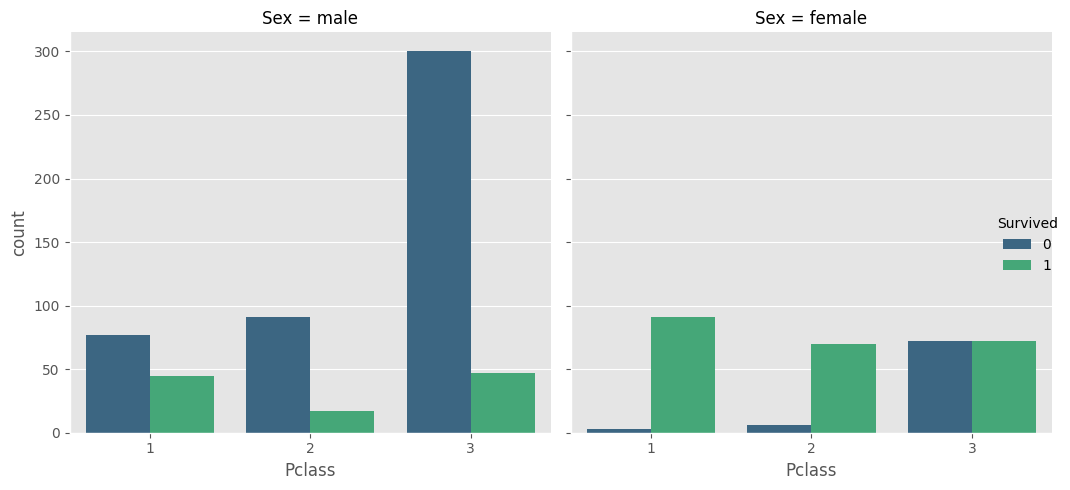

In [69]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = df, palette='viridis' )
plt.tight_layout()
print('Catplot of status of survived people from different pclass on sex status')


'Observation' :

- Though population of Pclass 3 was the highest, yet they had the least survival rate
- Males from Pclass 3 had the least survival rate


### 4. Visualization of people survived from different Embarkment

Countplot of Embarked Vs Number of People


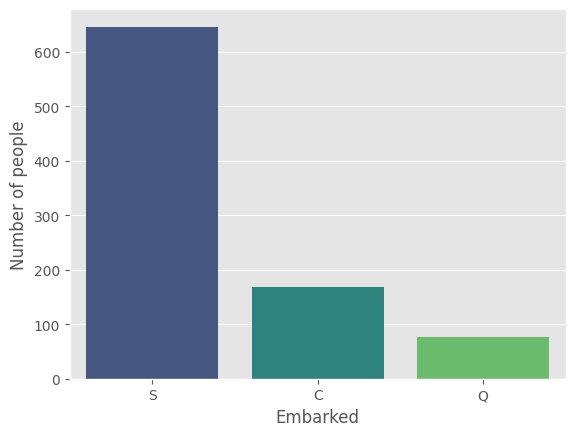

In [70]:
sns.countplot(x='Embarked', data=df, palette='viridis')
plt.xlabel("Embarked")
plt.ylabel("Number of people")
print('Countplot of Embarked Vs Number of People')
plt.show()


'observation' :

- People belong to Embarked 'S' has highest 
- People belong to Embarked 'C' has 2nd highest
- People belong to Embarked 'Q' has least


### 5. Visualization of Status of people survived or not Survived from different Embarkment

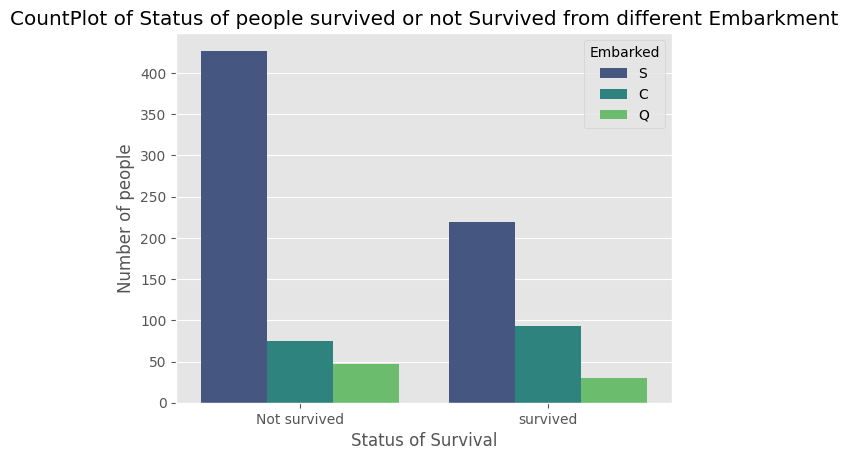

In [73]:
sns.countplot(x='Survived', hue='Embarked', data=df, palette='viridis')
plt.xlabel("Status of Survival")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1], labels=['Not survived','survived'])
plt.title('CountPlot of Status of people survived or not Survived from different Embarkment')
plt.show()


'observation' :

- Status of Not Survived people who belong to Embarked 'S' is highest as compare to Survived people.
- Status of Survived People
    - People belong to Embarked 'S' has highest
    - People belong to Embarked 'Q' has least

- Status of Not Survived people
    - People belong to Embarked 'S' has highest
    - People belong to Embarked 'Q' has least


### 6. Visualization of Subplot of SibSp Vs count and Parch Vs count

Subplot of SibSp Vs count and Parch Vs count


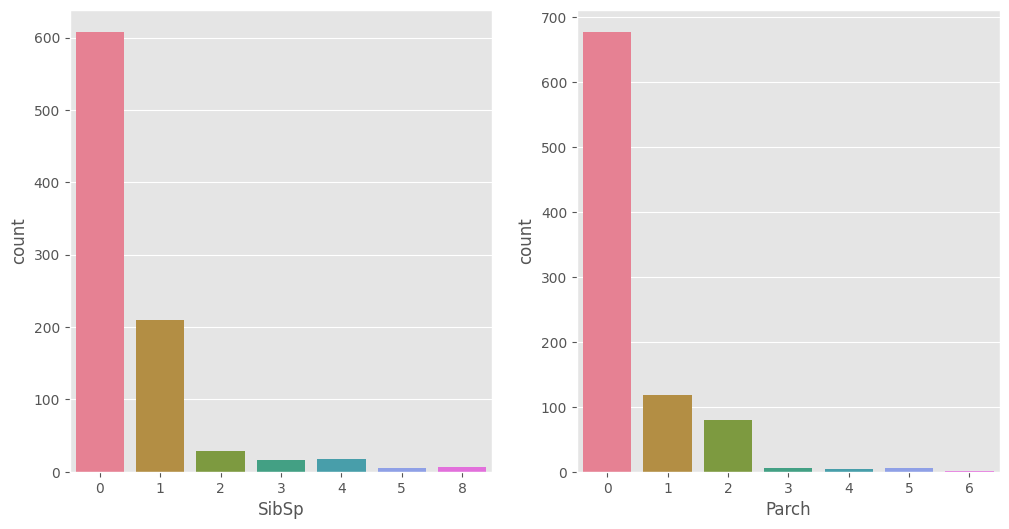

In [78]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='SibSp',data=df,ax=axes[0],palette='husl')
sns.countplot(x='Parch',data=df,ax=axes[1],palette='husl')
print('Subplot of SibSp Vs count and Parch Vs count')
plt.show()


'observation' :

- SibSp with '0' has highest with more than 600.
- SibSp With '5' has least

- Parch with '0' has highest with more than 680.
- Parch with '6' has least.


### 7. Visualization of Status of suvival Vs people with SibSp

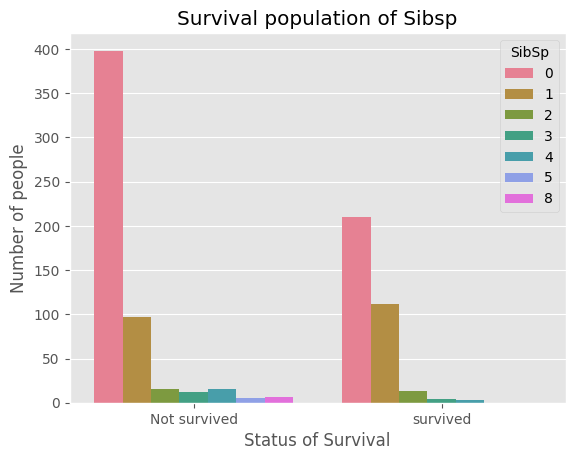

In [79]:
sns.countplot(x ='Survived', hue='SibSp', data=df, palette='husl')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Status of Survival")
plt.ylabel("Number of people")
plt.title("Survival population of Sibsp")
plt.show()


'observation' :

- Survived people who belong to SibSp '0' are more than 200.
- Not Survived people who belong to SibSp '0' approx 400.


### 8. Visualization of Status of survival population of Parch

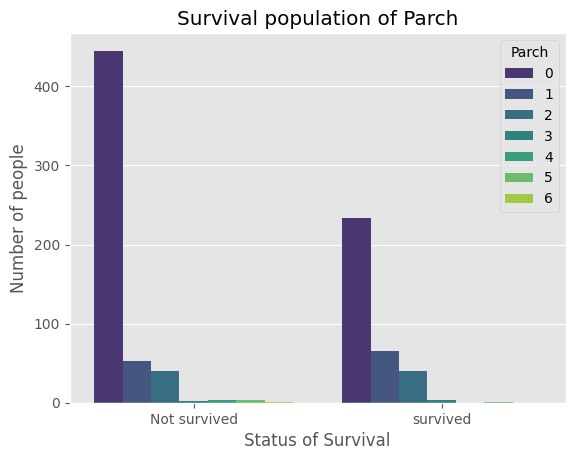

In [80]:
sns.countplot(x ='Survived', hue='Parch', data=df, palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Status of Survival")
plt.ylabel("Number of people")
plt.title("Survival population of Parch")
plt.show()


'observation' :

- Survived people who belong to Parch '0' are more than 230.
- Not Survived people who belong to Parch '0' approx 460.


### 9. Distribution of Fare and age represent as subplot

Distribution of Fare and Age as Subplot


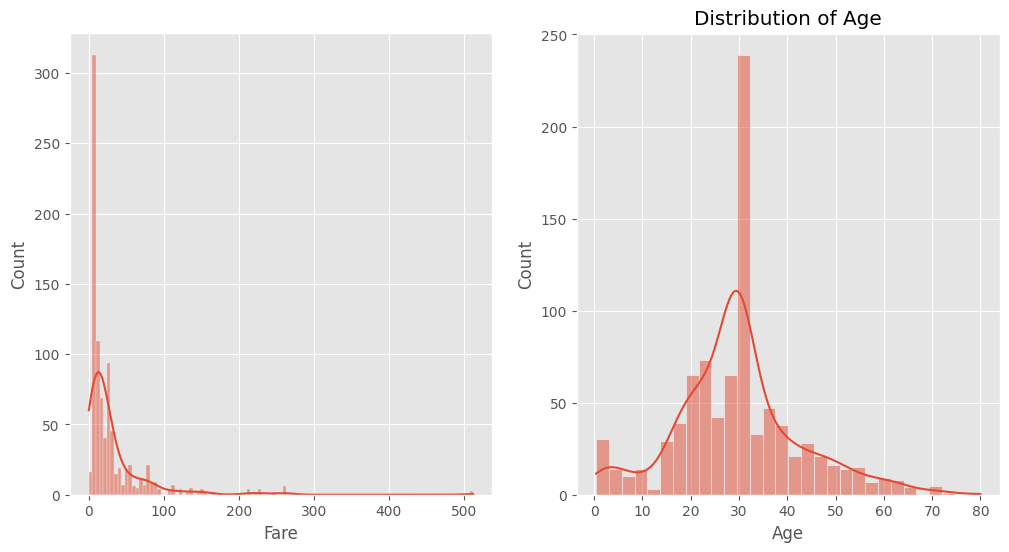

In [88]:
fig,axes = plt.subplots(1, 2, figsize = (12, 6))
print('Distribution of Fare and Age as Subplot')
sns.histplot(df['Fare'], kde=True, ax = axes[0])

sns.histplot(df['Age'].dropna(), kde=True, ax = axes[1])
plt.title('Distribution of Age')
plt.show()


'observation' :

- Right skew (also called positive skew). A right-skewed distribution is longer on the right side of its peak than on its left. Long tails points Right. 
- Left skew (also called negative skew). A left-skewed distribution is longer on the left side of its peak than on its right. long tails points left.

- A histogram in which most of the data falls to the right of the graph's peak is known as a right-skewed histogram. It is also known as a positively skewed histogram. A right-skewed histogram has a definite relationship between its mean, median, and mode which can be written as mean > median > mode.
- Here, Fare is Right Skewed which is positively skewed.


### 10. Distribution of Fare with respect to status of survived and not survived

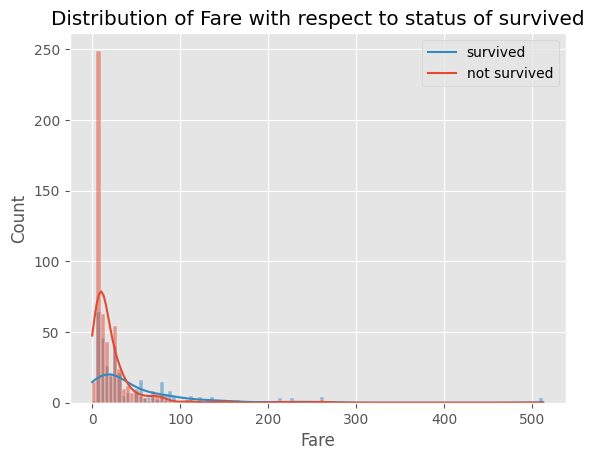

In [89]:
sns.histplot(x='Fare', hue='Survived', data=df, kde=True)
plt.legend(labels=['survived','not survived'])
plt.title('Distribution of Fare with respect to status of survived')
plt.show()


'observation' :

- Here, Fare wrt Not survived has highest in number 

### 11. Distribution of Age with respect to status of survived and not survived

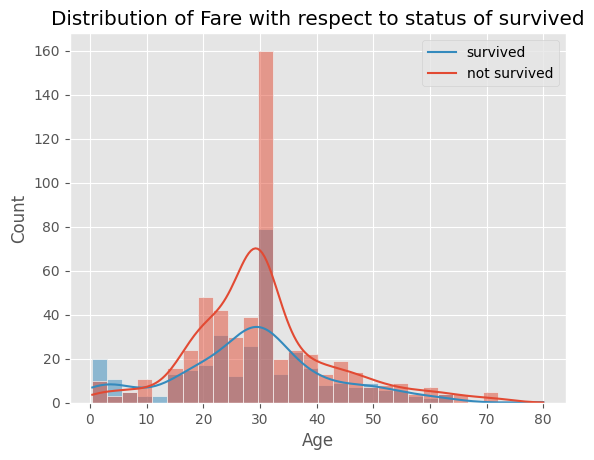

In [90]:
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.legend(labels=['survived','not survived'])
plt.title('Distribution of Fare with respect to status of survived')
plt.show()


'observation' :

- Most of people Age from 25 to 34 has not suvived.
- The people whose age around 28 to 32 has not survived in highest number
- Survived people are less in number as compare to not Survived


### Show Dataset

In [91]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


## Label Encoder

### Changing the Sex column and Embarked column from categorical to numerical for model training

### In Machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Lbel Encoding refers to converting the labels into numeric from so as to convert it into the machine-readable form.

In [93]:
labelencoder = LabelEncoder()
df['Sex'] = labelencoder.fit_transform(df['Sex'])

df.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1


### Checking the correlation of survival with other columns using heat map

### Correlation analysis is a method for measuring the covariance of two random variables in a matched data set. Covariance is usually expressed as the correlation coefficient of two variables X and Y. The correlation coefficient is a unitless number that varies from -1 to +1.

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


In [95]:
df_num = df[['Fare','Parch','SibSp','Age','Sex','Pclass','Embarked','Survived']]
df_num

,Fare,Parch,SibSp,Age,Sex,Pclass,Embarked,Survived
0,7.2500,0,1,22.000000,1,3,0,0
1,71.2833,0,1,38.000000,0,1,1,1
2,7.9250,0,0,26.000000,0,3,0,1
3,53.1000,0,1,35.000000,0,1,0,1
4,8.0500,0,0,35.000000,1,3,0,0
...,...,...,...,...,...,...,...,...
886,13.0000,0,0,27.000000,1,2,0,0
887,30.0000,0,0,19.000000,0,1,0,1
888,23.4500,2,1,29.699118,0,3,0,0
889,30.0000,0,0,26.000000,1,1,1,1


### Correlation

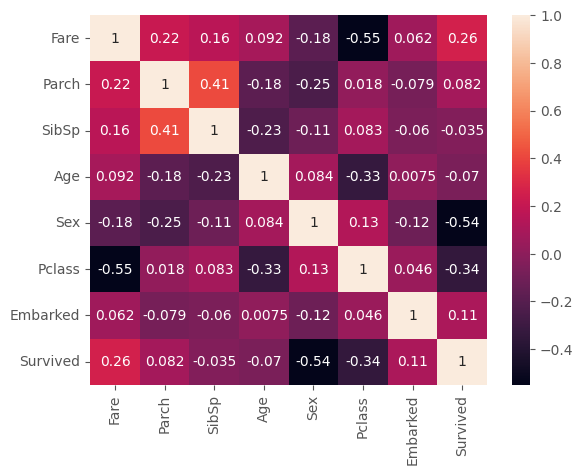

In [96]:
sns.heatmap(df_num.corr(), annot=True)
plt.show()


# Conclusion:

1. Gender Disparity: The survival rate among females was significantly higher compared to males. This observation aligns with 
the "women and children first" protocol followed during the Titanic disaster, reflecting societal norms of the time prioritizing
women's and children's safety.

2. Passenger Class Disparity: Although the population of passengers in Class 3 was the highest, they had the lowest survival rate.
This indicates a potential correlation between socio-economic status and survival, with passengers in higher classes likely having 
better access to lifeboats and other resources during the evacuation.

3. Gender and Passenger Class Interaction: Further analysis reveals that males from Class 3 had the lowest survival rate. This suggests
a compounded effect of gender and socio-economic status, where male passengers in the lower classes faced the highest risk of not surviving 
the disaster.

3. Age Factor: Young adults had the least survival rate, indicating that age played a role in survival outcomes. This could be attributed
to the "women and children first" policy, where younger individuals were given priority during the evacuation.

4. Correlation with Survived Column: The variables fare, sex, passenger class (Pclass), and embarkation point (Embarked) show correlations
with the survival outcome. This reinforces the importance of these factors in determining survival chances during the Titanic disaster.


'Observation' :

- Fare, sex, Pclass, Embarked, Age has correlation with survived column

### Model Prediction

In [97]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0


In [98]:
df_num

,Fare,Parch,SibSp,Age,Sex,Pclass,Embarked,Survived
0,7.2500,0,1,22.000000,1,3,0,0
1,71.2833,0,1,38.000000,0,1,1,1
2,7.9250,0,0,26.000000,0,3,0,1
3,53.1000,0,1,35.000000,0,1,0,1
4,8.0500,0,0,35.000000,1,3,0,0
...,...,...,...,...,...,...,...,...
886,13.0000,0,0,27.000000,1,2,0,0
887,30.0000,0,0,19.000000,0,1,0,1
888,23.4500,2,1,29.699118,0,3,0,0
889,30.0000,0,0,26.000000,1,1,1,1


### Features Engineering

In [99]:
X = df_num.drop(columns=(['Parch','SibSp','Survived']))
X

,Fare,Age,Sex,Pclass,Embarked
0,7.2500,22.000000,1,3,0
1,71.2833,38.000000,0,1,1
2,7.9250,26.000000,0,3,0
3,53.1000,35.000000,0,1,0
4,8.0500,35.000000,1,3,0
...,...,...,...,...,...
886,13.0000,27.000000,1,2,0
887,30.0000,19.000000,0,1,0
888,23.4500,29.699118,0,3,0
889,30.0000,26.000000,1,1,1


In [100]:
# Target
y = df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### 1. Logistic Regression

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
lr = LogisticRegression()
lr.fit(X_train, y_train)


LogisticRegression()

In [153]:
x_train_prediction = model.predict(X_train)
print("Predict of X train :\n" , x_train_prediction)


Predict of X train :
 [0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1
 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0
 0 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 

In [154]:
X_train

,Fare,Age,Sex,Pclass,Embarked
30,27.7208,40.000000,1,1,1
10,16.7000,4.000000,0,3,0
873,9.0000,47.000000,1,3,0
182,31.3875,9.000000,1,3,0
876,9.8458,20.000000,1,3,0
...,...,...,...,...,...
534,8.6625,30.000000,0,3,0
584,8.7125,29.699118,1,3,1
493,49.5042,71.000000,1,1,1
527,221.7792,29.699118,1,1,0


In [155]:
X_test

,Fare,Age,Sex,Pclass,Embarked
707,26.2875,42.000000,1,1,0
37,8.0500,21.000000,1,3,0
615,65.0000,24.000000,0,2,0
169,56.4958,28.000000,1,3,0
68,7.9250,17.000000,0,3,0
...,...,...,...,...,...
89,8.0500,24.000000,1,3,0
80,9.0000,22.000000,1,3,0
846,69.5500,29.699118,1,3,0
870,7.8958,26.000000,1,3,0


In [156]:
y_train

30     0
10     1
873    0
182    0
876    0
      ..
534    0
584    0
493    0
527    0
168    0
Name: Survived, Length: 712, dtype: int64

In [157]:
y_test

707    1
37     0
615    1
169    0
68     1
      ..
89     0
80     0
846    0
870    0
251    0
Name: Survived, Length: 179, dtype: int64

### Print metric to get Performance

In [158]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = lr.predict(X_test)
accuracy_l = accuracy_score(y_pred, y_test)
print("Accuracy score (Logistic Regression) :", round(accuracy_l*100, 2))


Accuracy score (Logistic Regression) : 77.65


In [159]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model (Logistic Regression) is : \n', cls_report)

classification report for our model (Logistic Regression) is : 
               precision    recall  f1-score   support

           0       0.88      0.76      0.81       116
           1       0.65      0.81      0.72        63

    accuracy                           0.78       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.80      0.78      0.78       179



### 2. KNN Nearest Neighbors

In [166]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5 , metric='minkowski', p = 2)
knn

KNeighborsClassifier()

In [167]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Print metric to get Performance

In [168]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = knn.predict(X_test)
accuracy_k = accuracy_score(y_pred, y_test)
print("Accuracy score (KNN - nearest neighbors) :", round(accuracy_k*100, 2))

Accuracy score (KNN - nearest neighbors) : 67.04


In [169]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model (KNN - nearest neighbors) is : \n', cls_report)

classification report for our model (KNN - nearest neighbors) is : 
               precision    recall  f1-score   support

           0       0.82      0.67      0.74       123
           1       0.48      0.68      0.56        56

    accuracy                           0.67       179
   macro avg       0.65      0.67      0.65       179
weighted avg       0.71      0.67      0.68       179



### 3. Decision tree classifier

In [170]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt


DecisionTreeClassifier()

In [171]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Print metric to get Performance

In [173]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = dt.predict(X_test)
accuracy_d = accuracy_score(y_pred, y_test)
print("Accuracy score (Decision tree classifer) :", round(accuracy_d*100 , 2))

Accuracy score (Decision tree classifer) : 77.09


In [174]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model(Decision tree classifier) is : \n', cls_report)

classification report for our model(Decision tree classifier) is : 
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       103
           1       0.72      0.75      0.74        76

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



In [ ]:
4. RandomForest Classifier

In [179]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy', random_state = 0)
Rf


RandomForestClassifier(criterion='entropy', random_state=0)

In [180]:
Rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

### Print metric to get Performance

In [181]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = Rf.predict(X_test)
accuracy_r = accuracy_score(y_pred, y_test)
print("Accuracy score (Random Forest Classifier) :", round(accuracy_r*100, 2))

Accuracy score (Random Forest Classifier) : 79.33


In [182]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model(Random Forest Classifier) is : \n', cls_report)

classification report for our model(Random Forest Classifier) is : 
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       107
           1       0.72      0.79      0.75        72

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.79      0.79       179



### 5. SVC

In [186]:
from sklearn.svm import SVC
svc = SVC(kernel ='rbf' , random_state = 0)
svc

SVC(random_state=0)

In [187]:
svc.fit(X_train, y_train)

SVC(random_state=0)

### Print metric to get Performance

In [188]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = svc.predict(X_test)
accuracy_s = accuracy_score(y_pred, y_test)
print("Accuracy score (SVC) :", round(accuracy_s*100, 2))

Accuracy score (SVC) : 62.01


In [189]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model(Random Forest Classifier) is : \n', cls_report)

classification report for our model(Random Forest Classifier) is : 
               precision    recall  f1-score   support

           0       0.95      0.60      0.74       158
           1       0.20      0.76      0.32        21

    accuracy                           0.62       179
   macro avg       0.58      0.68      0.53       179
weighted avg       0.86      0.62      0.69       179



### 6. Gaussian NB

In [190]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb


GaussianNB()

In [192]:
nb.fit(X_train, y_train)

GaussianNB()

### Print metric to get Performance

In [193]:
from sklearn.metrics import accuracy_score, precision_score, classification_report 
y_pred = nb.predict(X_test)
accuracy_g = accuracy_score(y_pred, y_test)
print("Accuracy score (Gaussian NB) :", round(accuracy_g*100, 2))

Accuracy score (Gaussian NB) : 77.09


In [194]:
cls_report = classification_report(y_pred, y_test)
print('classification report for our model(Random Forest Classifier) is : \n', cls_report)

classification report for our model(Random Forest Classifier) is : 
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       115
           1       0.65      0.80      0.71        64

    accuracy                           0.77       179
   macro avg       0.76      0.78      0.76       179
weighted avg       0.79      0.77      0.77       179



In [198]:
selection = pd.DataFrame({'Models' : ['Logistic Regression' , 'KNN' ,'Decision Tree', 'Random Forest' , 'SVC', 'Gaussian NB' ],
                          'Accuracy values' : [accuracy_l*100, accuracy_k*100 , accuracy_d*100, accuracy_r*100 , accuracy_s*100 , accuracy_g*100]})
selection.sort_values(by = 'Accuracy values' , ascending = False)


,Models,Accuracy values
3,Random Forest,79.329609
0,Logistic Regression,77.653631
2,Decision Tree,77.094972
5,Gaussian NB,77.094972
1,KNN,67.039106
4,SVC,62.011173


## Accuracy Comparison of Machine Learning Models

### Bar Plot for Comparing Scores from different models

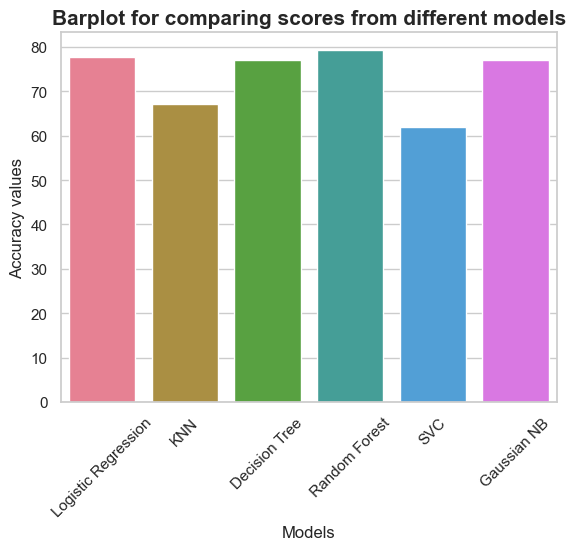

In [199]:
sns.set_theme(style = 'whitegrid')
sns.barplot(x = 'Models', y = 'Accuracy values', data = selection , palette = 'husl');
plt.xticks(rotation = 45)
plt.title('Barplot for comparing scores from different models' , weight = 'bold', size = 15)
plt.show()


## || Prediction With help of RandomForest Model ||

### Using test values

In [239]:
import warnings 
warnings.filterwarnings('ignore')
result = Rf.predict([[2,1,1,1,9]])

if result !=0:
    print('So Sorry! Passenger is not Survived')

else :
    print('Passenger is survived')
    

Passenger is survived


'observation':
- Middle one is Sex is either 0, 1 where 0 for female and 1 for male
- Male Passenger is survived
- predict from putting values to show the status of survived or not survived

In [240]:
import warnings 
warnings.filterwarnings('ignore')
result = Rf.predict([[2,1,0,1,9]])

if result !=0:
    print('So Sorry! Passenger is not Survived')

else :
    print('Passenger is survived')
    

So Sorry! Passenger is not Survived


'observation':
- Middle one is Sex is either 0, 1 where 0 for female and 1 for male
- Female Passenger is not survived

## Final Conclusion :
---


Status of Suvival people :

    - Only 38.38% people are Survived.
    - 61.62% people are not Survived.


Status of 'male' passenger :  

    - Only 18.89% male are Survived.
    - 81.11% people who are male are not survived.        


Status of 'Female' passenger :  

    - Only 74.20% female are survived.
    - 25.80% female are not survived

### Here, Status of Survival rate was higher in female comparison to male       


- Status of Not Survived people who belong to Embarked 'S' is highest as compare to Survived people.
- Status of Survived People
    - People belong to Embarked 'S' has highest
    - People belong to Embarked 'Q' has least

- Status of Not Survived people
    - People belong to Embarked 'S' has highest
    - People belong to Embarked 'Q' has least


In this project, I explored the task of Titanic Survival Prediction. My analysis revealed valuable insights into the performance and effectiveness of the model in capturing the survival prediction.

In this project, I compared six machine learning algorithms for Titanic Survival prediction with their accuracy :

1. Logistic Regression	:   Accuracy 77.65%
2. Decision Tree :  Accurcay 77.09%
3. Random Forest :	Accuracy 79.32%
4. SVC : Accuracy 62.01%
5. KNN : Accuracy 67.03%
6. SVC : Accuracy 62.01%


Random Forest slightly outperformed the Logistic Regression , Decision Tree Classifier,Gaussian NB, KNN & SVC, indicating it was better suited for this dataset. However, All models demonstrated strong performance, confirming the effectiveness of these techniques for Titanic survival prediction . 
Future work could explore other advanced algorithms to further improve accuracy.




## Conclusion :


### These findings suggest that Random Forest model with Accuracy (79.32%) shows potential for accurately predicting survival. However, it's important to acknowledge that there may be additional factors and complexities influencing prediction that were not captured in our analysis. Further research and refinement of the model, possibly incorporating additional features or employing more advanced modeling techniques, could lead to even more accurate predictions.